<a href="https://colab.research.google.com/github/suneha113/Social-Media-Sentiment-Analysis/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Relevent Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
305,306,310,"Frustrated fingers tapping on the keyboard, a...",Frustrated,2020-12-17 09:20:00,PuzzleComposer,Instagram,#Frustrated #UnsolvablePuzzle,12.0,24.0,India,2020,12,17,9
406,407,411,Heartfelt gratitude for the laughter shared du...,Gratitude,2017-12-28 19:15:00,FamilyGatherer,Facebook,#Gratitude #FamilyLaughter,22.0,45.0,Austria,2017,12,28,19
245,246,250,"Fueled by curiosity, venturing into uncharted...",Curiosity,2022-12-01 09:15:00,FearlessExplorer,Facebook,#Curiosity #FearlessExplorer,22.0,44.0,India,2022,12,1,9
59,60,62,An amusing incident brightened up my day! ...,Amusement,2023-02-14 14:20:00,AmusedSoul,Instagram,#Amusement #FunTimes,18.0,35.0,UK,2023,2,14,14
326,327,331,"Devastated, a heart in ruins, the echoes of s...",Devastated,2022-10-28 11:15:00,RuinedHeart,Instagram,#Devastated #EchoesOfShatteredDreams,25.0,50.0,Australia,2022,10,28,11


In [ ]:
#finding dtypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
#Finding the no. of rows and cols. in the dataset
df.shape

(732, 15)

In [ ]:
#dropping the two cols. that we dont need
df=df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [ ]:
#checking for missing values
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(20)

In [ ]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#checking for the no. of rows & cols. after removing the duplicate records
df.shape

(712, 13)

In [ ]:
#checking for the count of each unique value in 'Sentiment' col
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Happy,14
...,...
Vibrancy,1
Culinary Adventure,1
Mesmerizing,1


In [ ]:
df['Timestamp']

,Timestamp
0,2023-01-15 12:30:00
1,2023-01-15 08:45:00
2,2023-01-15 15:45:00
3,2023-01-15 18:20:00
4,2023-01-15 19:55:00
...,...
727,2017-08-18 18:20:00
728,2018-06-22 14:15:00
729,2019-04-05 17:30:00
730,2020-02-29 20:45:00


In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp']) #converting the 'Timestamp' col. into Pandas datetime format
df['Year']=df['Timestamp'].dt.year #extracting the year component from each datetime object in the 'Timestamp' col
df['Month']=df['Timestamp'].dt.month #extracting the month component from each datetime object in the 'Timestamp' col
df['Day']=df['Timestamp'].dt.day #extracting the day component from each datetime object in the 'Timestamp' col

In [ ]:
df.sample(10) #to see if the changes we made are in effect

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
707,Experimenting with a new recipe for a school b...,Neutral,2023-10-05 14:15:00,BakeSaleRecipeExperimentHighSchool,Instagram,#BakingAdventures #HighSchoolBakes,21.0,43.0,USA,2023,10,5,14
237,"Lost in the labyrinth of thoughts, confusion ...",Confusion,2020-06-05 12:15:00,ShadowedSeeker,Twitter,#Confusion #LabyrinthOfThoughts,14.0,28.0,Australia,2020,6,5,12
136,Elation over discovering a hidden gem in the ...,Elation,2012-02-18 14:30:00,UrbanExplorer2,Twitter,#Elation #HiddenGem,20.0,40.0,USA,2012,2,18,14
495,"In the embrace of the Grand Canyon, nature's m...",Awe,2020-06-15 16:45:00,CanyonMarveler,Instagram,#Awe #EarthsGrandeur,25.0,50.0,USA,2020,6,15,16
529,Swaying to the reggae vibes of Bob Marley's tr...,Journey,2020-03-05 18:45:00,MarleyReggaeTraveler,Instagram,#Journey #BobMarleyTribute,30.0,60.0,Jamaica,2020,3,5,18
330,Shattered dreams lie on the floor like fragme...,Frustrated,2022-01-07 11:10:00,DreamMosaic,Twitter,#Frustrated #MosaicOfDisappointment,15.0,30.0,Canada,2022,1,7,11
194,"Frustration escalates, a thunderstorm of emot...",Frustration,2022-04-05 14:45:00,ThunderingMind,Instagram,#Frustration #EmotionalOutburst,12.0,25.0,UK,2022,4,5,14
505,"At the summit of Mount Fuji, a breathtaking su...",Accomplishment,2020-04-15 05:30:00,FujiSummitAchiever,Facebook,#Accomplishment #SunriseHues,28.0,55.0,Japan,2020,4,15,5
417,Imbued with gratitude for the simple pleasure ...,Gratitude,2023-02-15 08:30:00,TeaEnthusiast,Twitter,#Gratitude #WarmTea,18.0,35.0,Japan,2023,2,15,8
246,"Wrapped in the cloak of emotional numbness, a ...",Numbness,2021-11-30 15:30:00,TurbulentShield,Instagram,#Numbness #EmotionalStorms,10.0,20.0,Canada,2021,11,30,15


In [ ]:
cat_df=df.select_dtypes(include='object') #creatinng a new df having only cols. with categorical value

In [ ]:
cat_df

,Text,Sentiment,User,Platform,Hashtags,Country
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,USA
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,Canada
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,USA
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,Australia
...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,UK
728,Attending a surprise birthday party organized ...,Happy,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,USA
729,Successfully fundraising for a school charity ...,Happy,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Canada
730,"Participating in a multicultural festival, cel...",Happy,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,UK


In [ ]:
#removing leading and trailing whitespace characters (spaces, tabs, newlines) from the strings in the selected cols.
for i in cat_df.columns:
  df[i]=df[i].str.strip()

In [ ]:
df.sample(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
252,"Extending a hand, empathetic threads weaving a...",Empathetic,2018-04-03 14:15:00,ThreadWeaver,Instagram,#Empathetic #TapestryOfUnderstanding,15.0,30.0,UK,2018,4,3,14
615,"Participated in a community art class, unleash...",Joy,2023-06-24 16:15:00,ArtisticSenior,Twitter,#CreativityAtAnyAge #SeniorCreativity,22.0,45.0,Canada,2023,6,24,16
648,Accidentally spilled paint in art class. Abstr...,Embarrassed,2023-08-07 19:45:00,PaintSpillHighSchool,Instagram,#ArtisticMishaps #HighSchoolArt,22.0,45.0,UK,2023,8,7,19


**EDA**

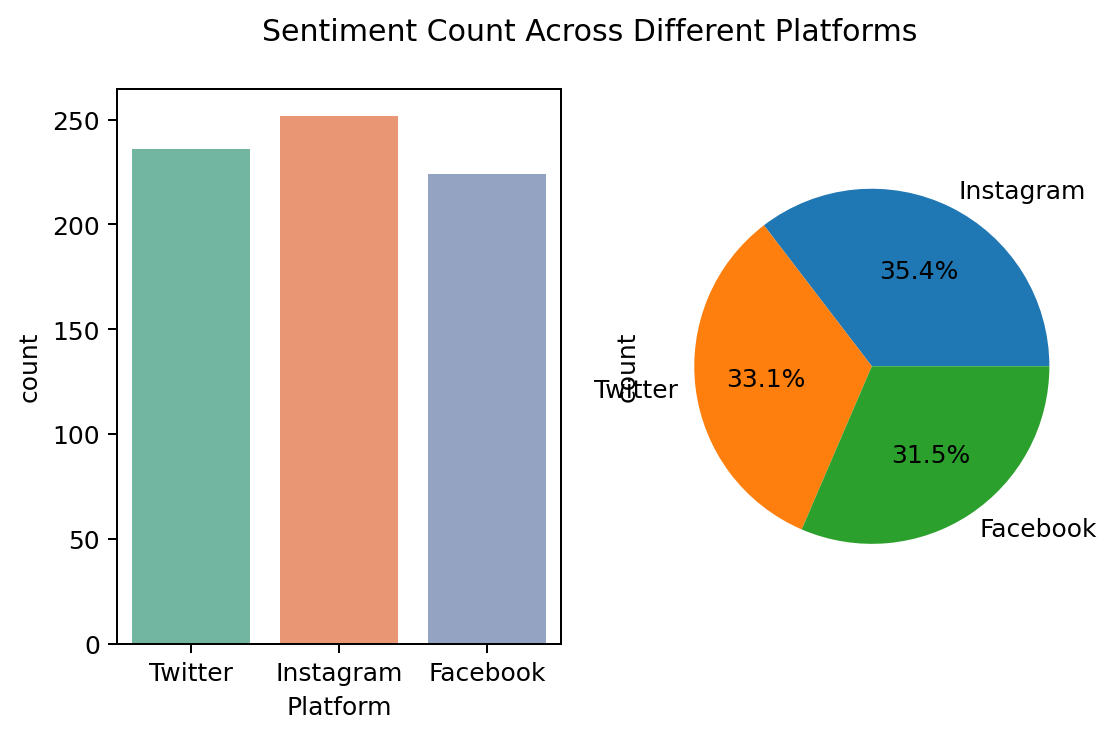

In [ ]:
fig, axis=plt.subplots(1, 2, figsize=(7, 4), dpi=180)
fig.suptitle("Sentiment Count Across Different Platforms")
sns.countplot(x='Platform', data=df, ax=axis[0], palette="Set2")
df["Platform"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axis[1])
plt.show()

The above visualizations display the sentiment count distribution across three social media platforms: Twitter, Instagram, and Facebook;showing that Instagram has the highest share of sentiment data (35.4%), followed by Twitter (33.1%) and Facebook (31.5%)

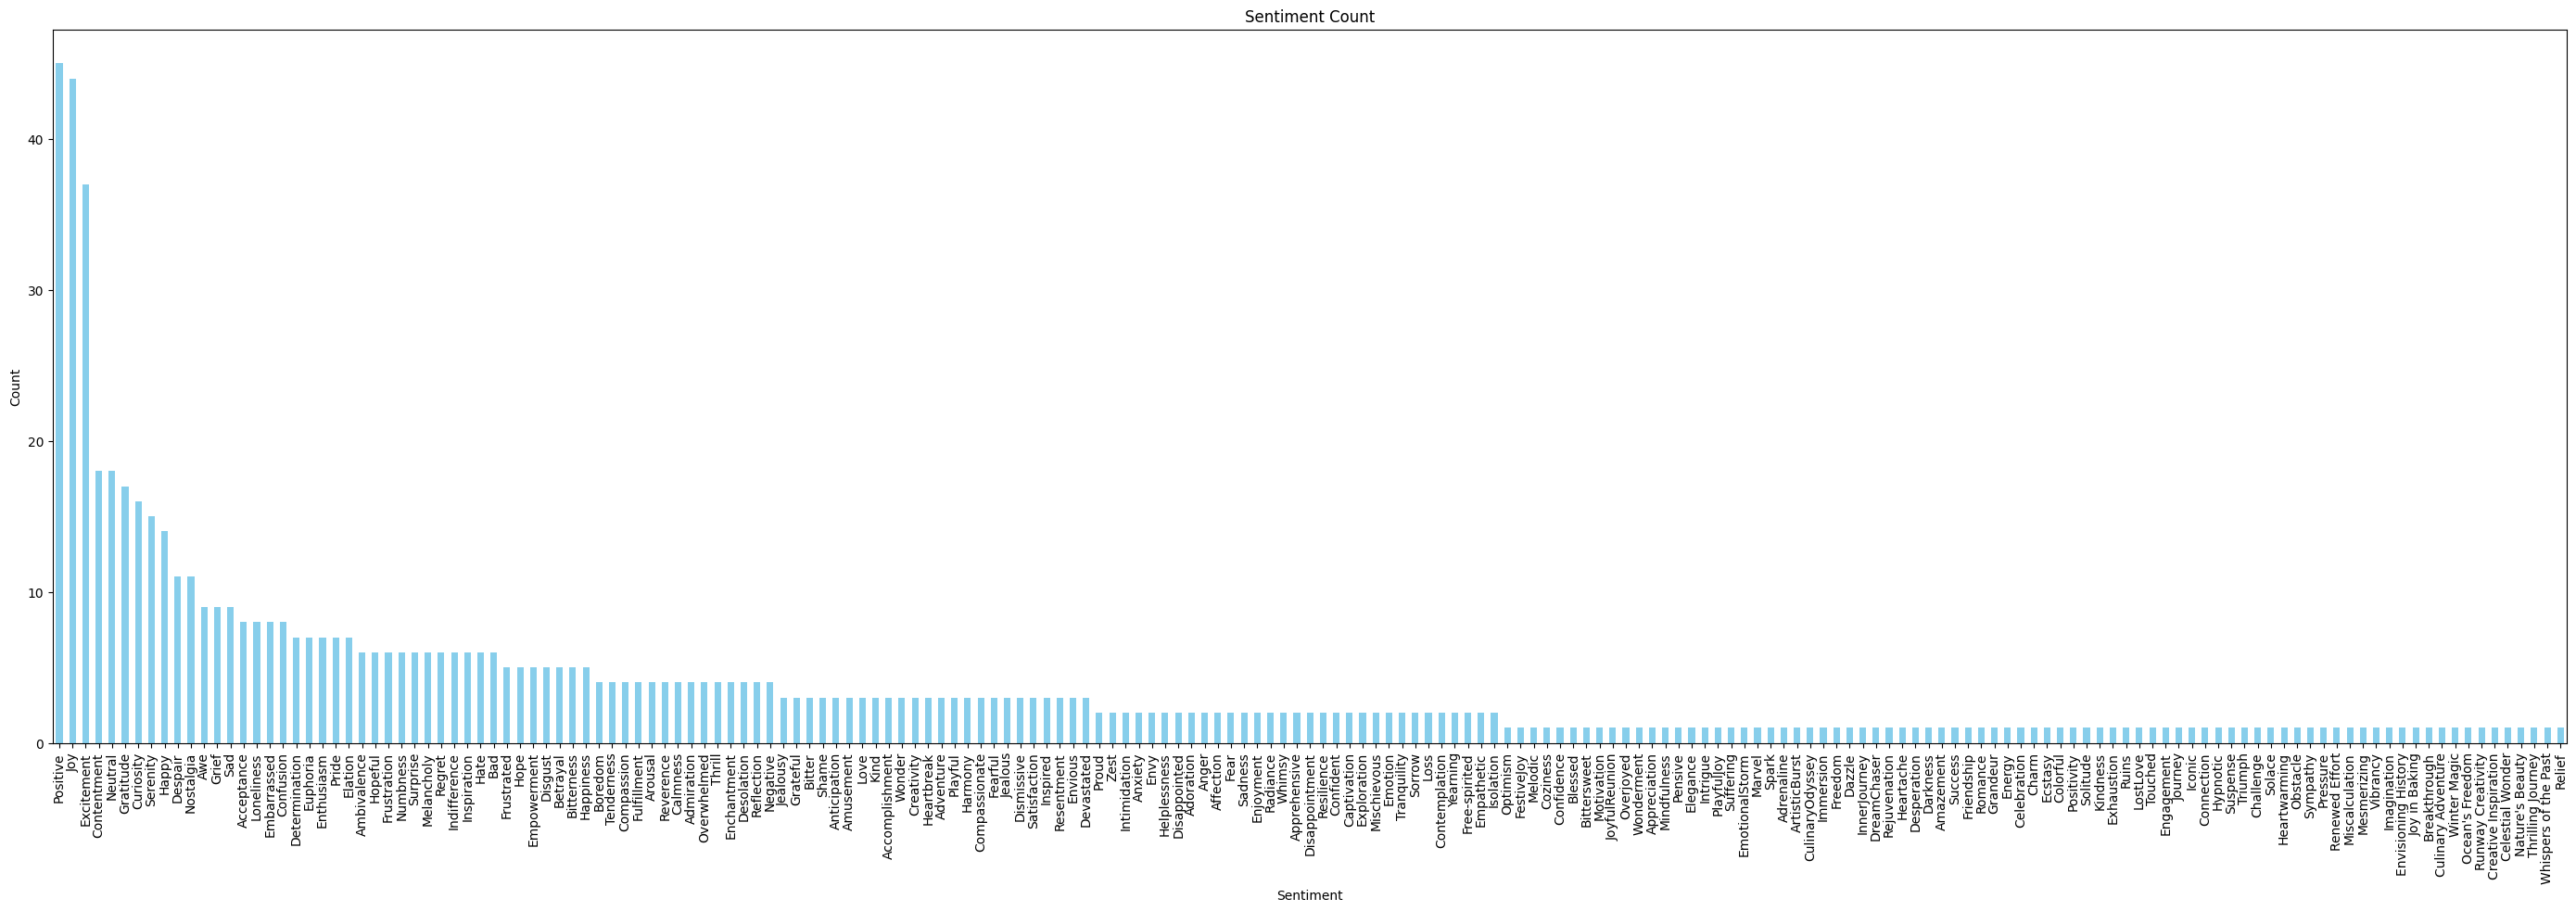

In [ ]:
plt.figure(figsize=(35,10))
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The above bar chart shows the count of different sentiment categories, revealing that some sentiments, such as "Positive," "Happy," and "Excited" occur far more frequently than others in the dataset.



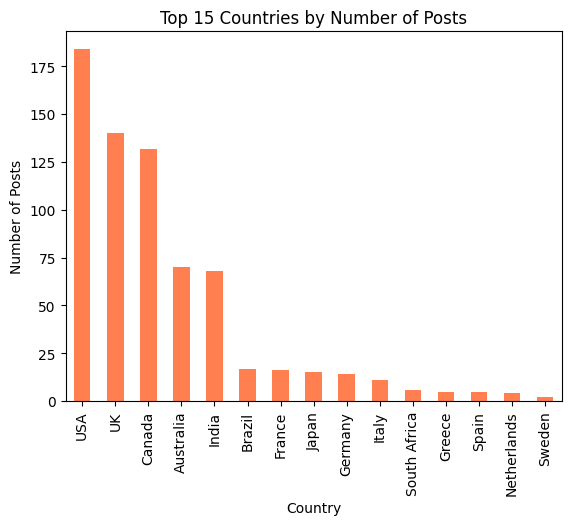

In [ ]:
plt.figure()
df['Country'].value_counts().head(15).plot(kind='bar', color='coral')
plt.title('Top 15 Countries by Number of Posts')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.show()

This bar chart displays the top 15 countries by number of social media posts, showing that the USA, UK, and Canada have the highest activity levels among all countries represented in the dataset.

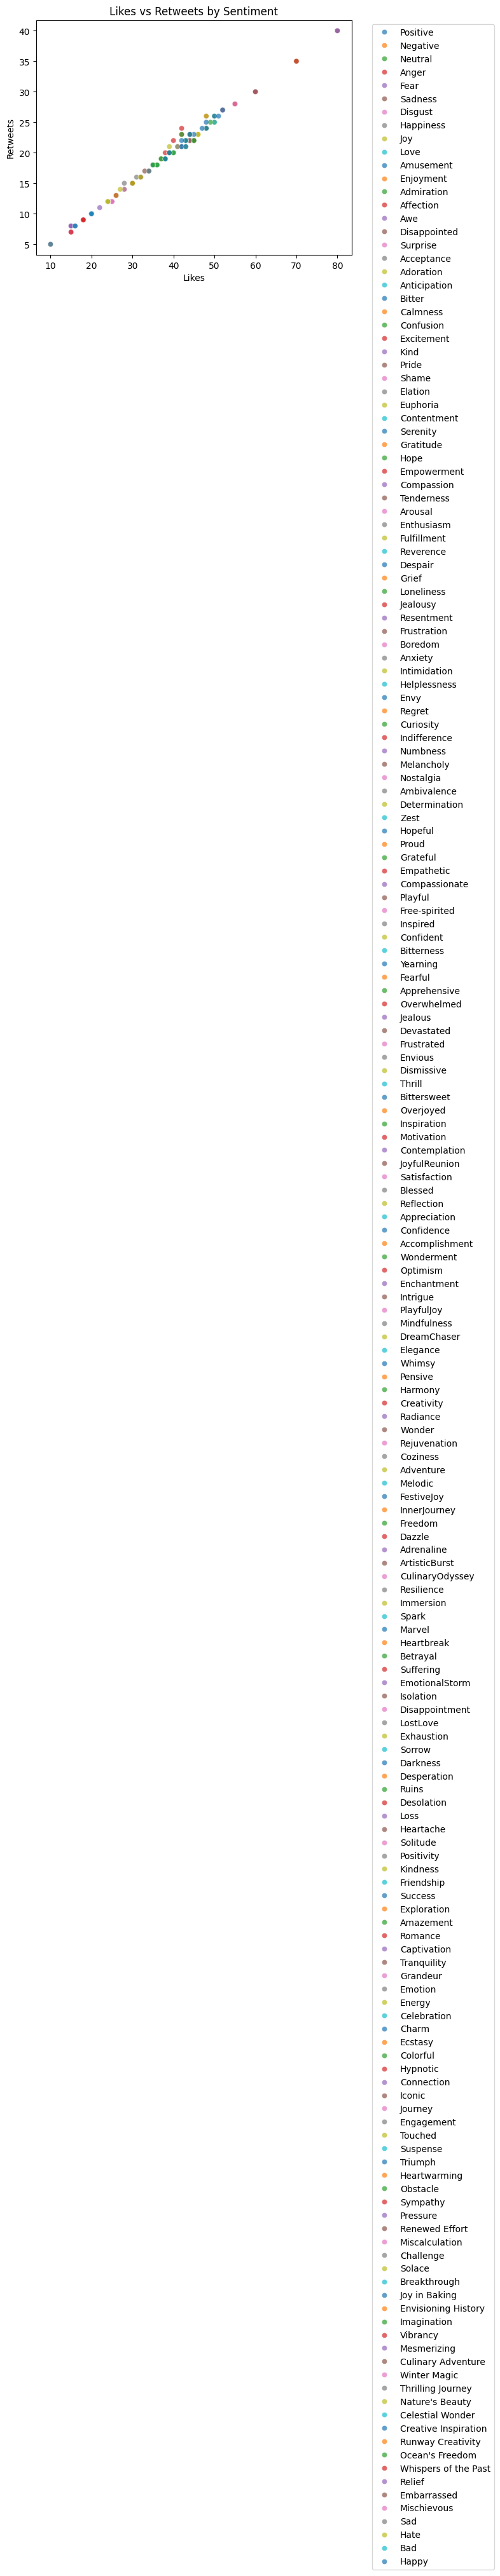

In [ ]:
plt.figure()
sns.scatterplot(x='Likes', y='Retweets', hue='Sentiment', data=df, palette='tab10', alpha=0.7)
plt.title('Likes vs Retweets by Sentiment')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

The above scatter plot displays the relationship between likes and retweets for social media posts, grouped by sentiment categories, showing that posts with more likes tend to receive more retweets across various sentiments

In [ ]:
df['Sentiment'].unique() #displaying all the various sentiments present

array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [ ]:
#Grouping all these sentiments into broader categories:
sentiment_dict={# Positive sentiments
                'Positive': 'Positive', 'Positivity':'Positive', 'Exploration':'Positive',
                'Surprise': 'Positive',
                'Amusement': 'Positive',
                'Affection': 'Positive',
                'Awe': 'Positive',
                'FestiveJoy': 'Positive',
                'Enjoyment':'Positive', 'Engagement': 'Positive', 'Reverence': 'Positive',
                'Acceptance': 'Positive','Creativity': 'Positive',
                'Radiance': 'Positive', 'Wonder': 'Positive', 'Rejuvenation': 'Positive',
                'Adoration': 'Positive', 'Elegance': 'Positive', 'DreamChaser': 'Positive',
                'Relief': 'Positive', 'PlayfulJoy': 'Positive', 'Harmony': 'Positive',
                'Friendship': 'Positive', 'Marvel':'Positive', 'Spark':'Positive', 'Soltitude':'Positive',
                'Success': 'Positive', 'Resilience':'Positive', 'Breakthrough': 'Positive', 'Granduer':'Positive',
                'Thrilling Journey': 'Positive', 'Accomplishment':'Positive', 'Wonderment': 'Positive', 'Enchantment':'Positive',
                'Solace': 'Positive', 'Hope':'Positive', 'Blessed':'Positive', 'Mindfulness': 'Positive',
                'Mesmerizing': 'Positive', 'Thrill': 'Positive', 'Free-spirited': 'Positive',
                'Touched': 'Positive', 'Satisfaction':'Positive', 'Inspiration':'Positive', 'Motivation':'Positive',
                'Joy in Baking': 'Positive', 'Whimsy':'Positive', 'Appreciation': 'Positive', 'Coziness': 'Positive',
                'Charm': 'Positive', 'Renewed Effort':'Positive', "Nature's Beauty": 'Positive', 'Melodic': 'Positive',
                'Celestial Wonder': 'Positive', 'Winter Magic': 'Positive', "Culinary Adventure": 'Positive',
                'Thrilling Journey': 'Positive', 'Vibrancy':'Positive', 'Creative Inspiration': 'Positive', 'Runaway Creativity':'Positive',
                'Tranquility': 'Positive', 'Heartwarming': 'Positive', 'Success': 'Positive',
                'Kindness': 'Positive', 'Triumph':'Positive', 'Colorful':'Positive', 'Celebration':'Positive',
                'Iconic': 'Positive', 'Ecstacy': 'Positive','Amazement': 'Positive','Romance': 'Positive',
    'Happiness': 'Positive', 'Kind':'Positive', 'Elation':'Positive', 'Euphoria':'Positive', 'Serenity':'Positive',
    'Joy': 'Positive', 'Compassion':'Positive', 'Tenderness':'Positive', 'Enthusiasm':'Positive',
    'Love': 'Positive', 'Fulfillment':'Positive', 'Proud':'Positive', 'Confident':'Positive', 'Determination':'Positive',
    'Admiration': 'Positive', 'Zest': 'Positive', 'Calmness':'Positive', 'Compassionate':'Positive', 'Empathetic':'Positive',
    'Gratitude': 'Positive', 'Adventure': 'Positive', 'FestiveJoy':'Positive', 'Freedom':'Positive',
    'Pride': 'Positive', 'Dazzle': 'Positive', 'Adrenaline': 'Positive', 'Arousal': 'Positive',
    'Contentment': 'Positive', 'ArtisticBurst': 'Positive', 'CulinaryOdyssey': 'Positive',
    'Excitement': 'Positive',
    'Optimism': 'Positive',
    'Playful': 'Positive',
    'Inspired': 'Positive',
    'Confidence': 'Positive',
    'Happy': 'Positive',
    'Hopeful': 'Positive',
    'Overjoyed': 'Positive',
    'JoyfulReunion': 'Positive',
    'Grateful': 'Positive',
    'Empowerment': 'Positive',
    # Negative sentiments
    'Negative': 'Negative',
    'Anger': 'Negative', 'Confusion': 'Negative', 'Disappointment': 'Negative', 'Shame': 'Negative',
    'Resentment': 'Negative', 'Anxiety': 'Negative', 'Intimidation': 'Negative', 'Helplessness': 'Negative',
    'Fear': 'Negative', 'Envy':'Negative', 'Melancholy': 'Negative', 'Bitterness': 'Negative', 'Fearful': 'Negative',
    'Sadness': 'Negative', 'Overwhelmed': 'Negative', 'Jealous': 'Negative', 'Envious': 'Negative',
    'Disillusionment': 'Negative', 'Dismissiveness': 'Negative', 'Contemplation': 'Negative',
    'Disgust': 'Negative','Heartbreaking': 'Negative', 'Betrayal': 'Negative', 'Suffering': 'Negative',
    'Frustration': 'Negative', 'Suffering': 'Negative', 'Emotional Storm': 'Negative', 'Isolation': 'Negative',
    'Despair': 'Negative', 'LostLove': 'Negative', 'Exhaustion': 'Negative', 'Darkness': 'Negative',
    'Loneliness': 'Negative', 'Desperation': 'Negative', 'Ruins': 'Negative', 'Desolation': 'Negative',
    'Regret': 'Negative', 'Loss': 'Negative', 'Heartache': 'Negative', 'Miscalculation': 'Negative',
    'Jealousy': 'Negative', 'Obstacle': 'Negative', 'Pressure': 'Negative', 'Whispers of Past': 'Negative',
    'Bitter': 'Negative',
    'Grief': 'Negative',
    'Hate': 'Negative',
    'Embarrassed': 'Negative',
    'Bad': 'Negative',
    'Sorrow': 'Negative',
    'Disappointed': 'Negative',
    'Frustrated': 'Negative',
    'Jealous': 'Negative',
    'Devastated': 'Negative',
    'Sad': 'Negative', 'Numbness': 'Negative' ,

    # Neutral/Other sentiments
    'Neutral': 'Neutral',
    'Indifference': 'Neutral', 'Pensive': 'Neutral', 'Imagination': 'Neutral', 'Immersion': 'Neutral',
    'Anticipation': 'Neutral', 'Intrigue': 'Neutral', 'Connection': 'Neutral',
    'Captivation': 'Neutral', 'Envisioning History': 'Neutral', "Ocean's Freedom": 'Neutral',
    'Ambivalence': 'Neutral',
    'Mischievous': 'Neutral',
}

In [ ]:
# Map detailed sentiments to broader groups
df['Sentiment_Broad'] = df['Sentiment'].map(sentiment_dict)

# For any sentiments not in the mapping, fill with 'Neutral'
df['Sentiment_Broad'] = df['Sentiment_Broad'].fillna('Neutral')

print(df[['Sentiment', 'Sentiment_Broad']].sample(20))

           Sentiment Sentiment_Broad
189          Despair        Negative
155      Empowerment        Positive
160      Fulfillment        Positive
54           Sadness        Negative
36          Positive        Positive
349    Contemplation        Negative
245        Curiosity         Neutral
689              Sad        Negative
578  Ocean's Freedom         Neutral
206        Curiosity         Neutral
112         Serenity        Positive
142      Empowerment        Positive
348        Amusement        Positive
42          Positive        Positive
665       Excitement        Positive
227        Confusion        Negative
99             Shame        Negative
521       Creativity        Positive
464          Despair        Negative
377          Pensive         Neutral


In [ ]:
df['Sentiment_Broad'].value_counts()

,count
Sentiment_Broad,
Positive,426
Negative,181
Neutral,105


In [ ]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Broad
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Positive
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Positive
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral


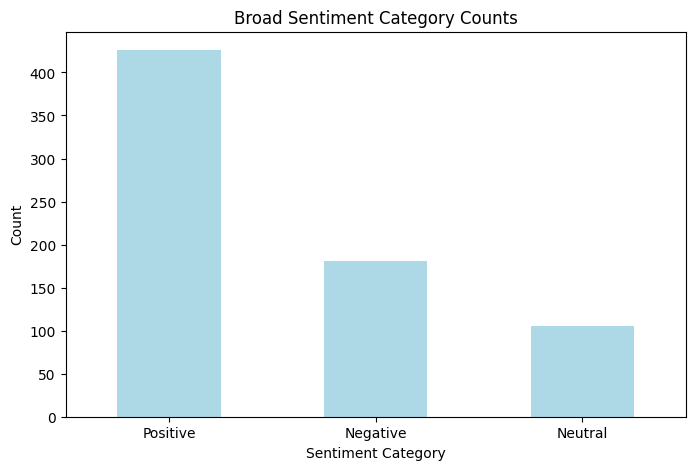

In [ ]:
plt.figure(figsize=(8,5))
df['Sentiment_Broad'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Broad Sentiment Category Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This bar chart shows the distribution of broad sentiment categories in the data, indicating that positive sentiments are the most common, followed by negative and neutral sentiments.

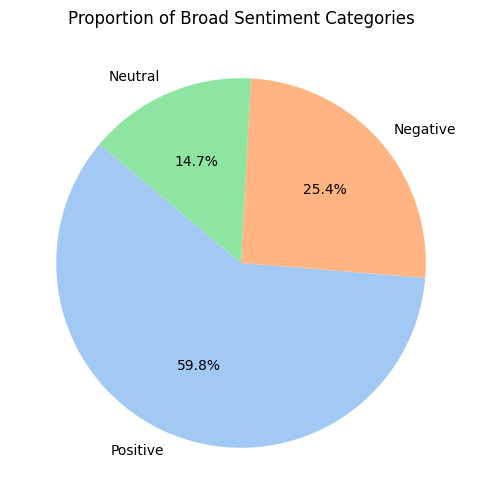

In [ ]:
plt.figure(figsize=(6,6))
df['Sentiment_Broad'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Broad Sentiment Categories')
plt.ylabel('')
plt.show()

This pie chart illustrates the proportion of broad sentiment categories, showing that nearly 60% of posts have positive sentiment, about 25% are negative, and approximately 15% are neutral.

<Figure size 1200x600 with 0 Axes>

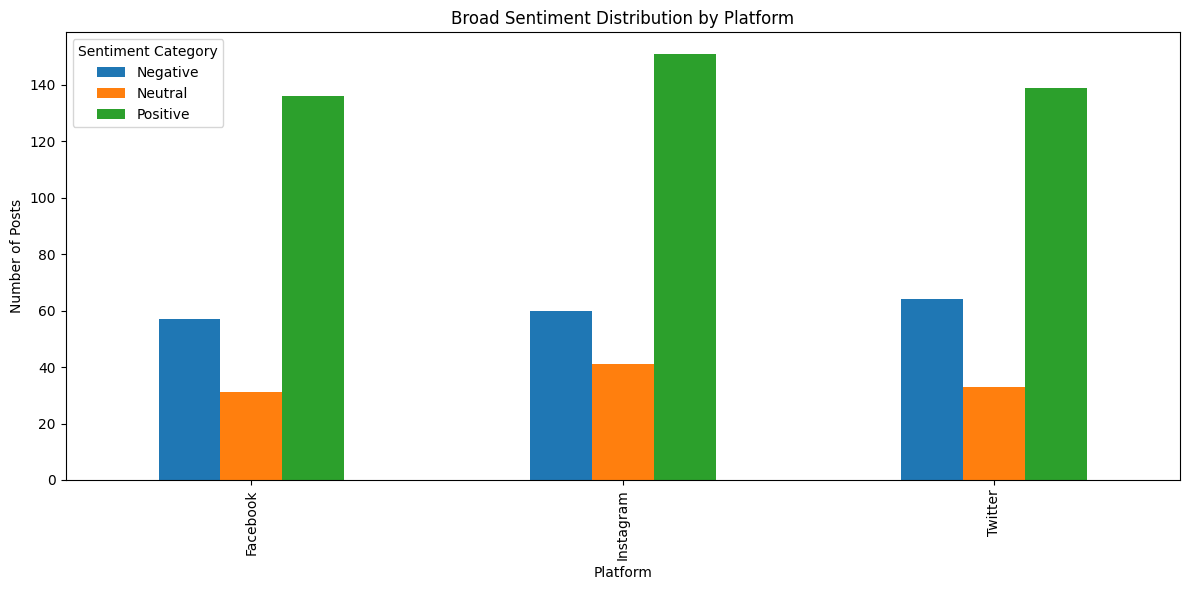

In [ ]:
plt.figure(figsize=(12,6))
platform_sentiment = df.groupby(['Platform', 'Sentiment_Broad']).size().unstack().fillna(0)
platform_sentiment.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Broad Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment Category')
plt.tight_layout()
plt.show()

This grouped bar chart displays the distribution of broad sentiment categories—positive, negative, and neutral—across Facebook, Instagram, and Twitter, revealing that positive sentiment posts are most prevalent on all platforms.

<Figure size 1200x600 with 0 Axes>

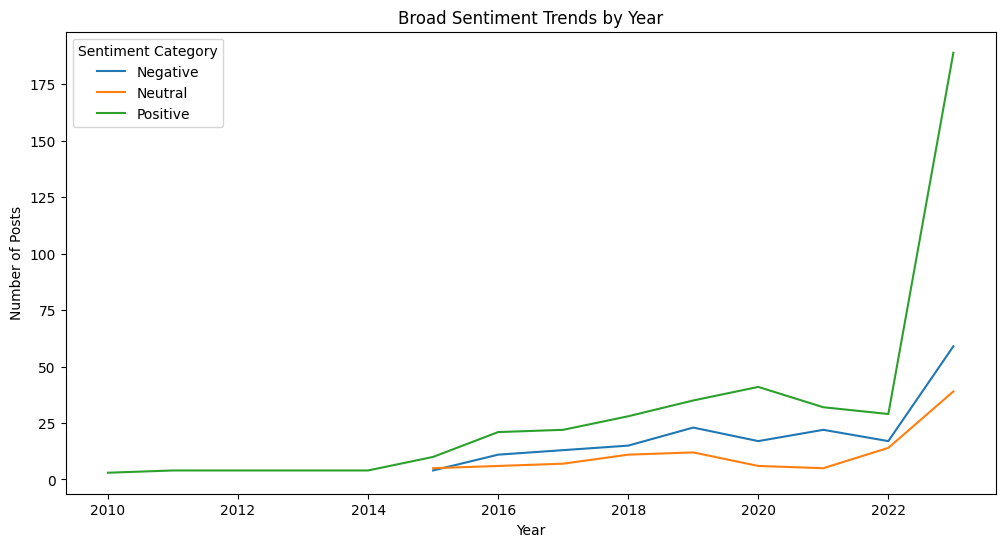

In [ ]:
if 'Year' in df.columns:
    plt.figure(figsize=(12,6))
    df.groupby(['Year', 'Sentiment_Broad']).size().unstack().plot(figsize=(12,6))
    plt.title('Broad Sentiment Trends by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Posts')
    plt.legend(title='Sentiment Category')
    plt.show()
else:
    print("Column 'Year' not found in dataset.")

This line chart presents the trend of broad sentiment categories by year, indicating that the number of positive posts has increased sharply over time compared to neutral and negative posts.

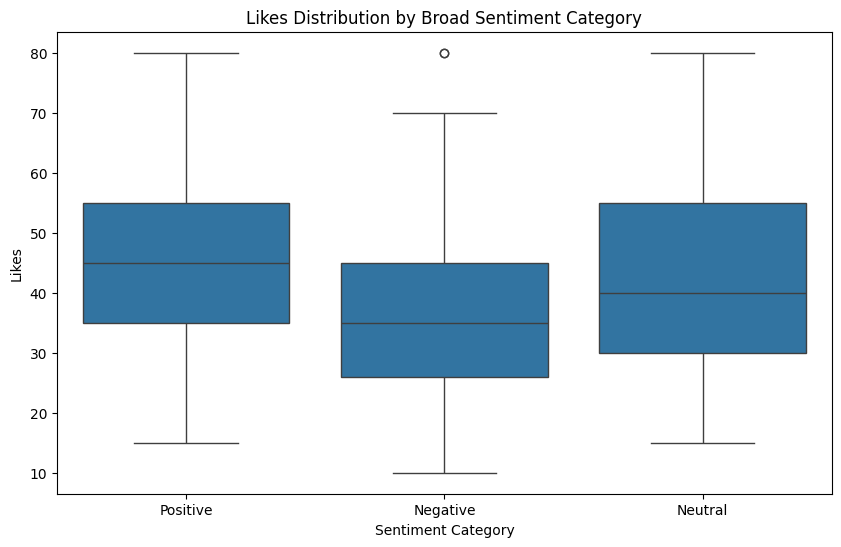

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sentiment_Broad', y='Likes', data=df)
plt.title('Likes Distribution by Broad Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.show()

This box plot illustrates how likes are distributed among posts with positive, negative, and neutral sentiments, revealing that positive posts generally receive a higher number of likes

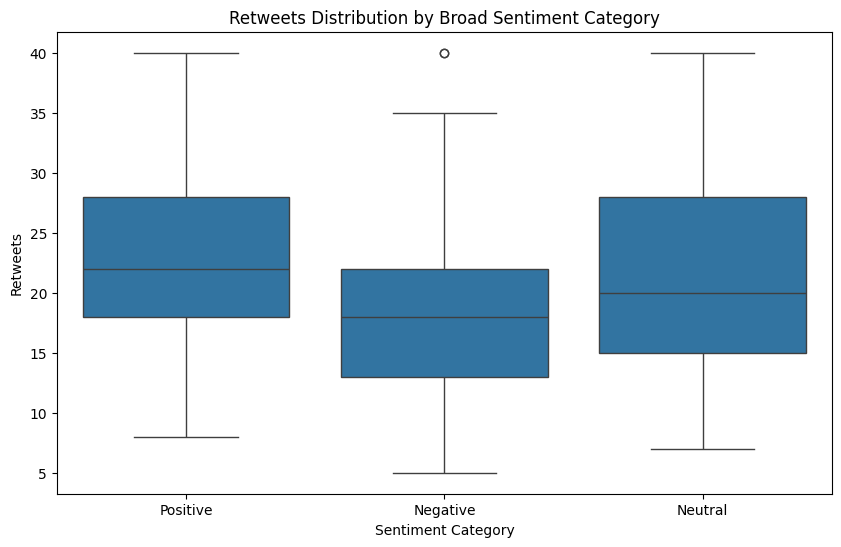

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Sentiment_Broad', y='Retweets', data=df)
plt.title('Retweets Distribution by Broad Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Retweets')
plt.show()

This box plot shows the distribution of retweets across positive, negative, and neutral sentiment categories, indicating that positive and neutral posts tend to receive more retweets than negative ones

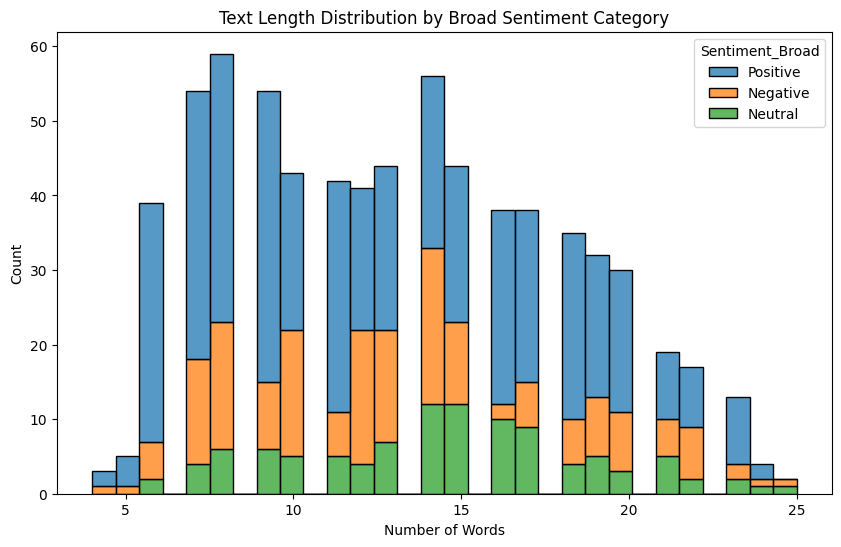

In [ ]:
# Text Length Distribution by Sentiment - Histogram
df['Text_Length'] = df['Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Text_Length', hue='Sentiment_Broad', multiple='stack', bins=30)
plt.title('Text Length Distribution by Broad Sentiment Category')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

This stacked bar chart shows how the length of text (in number of words) varies with sentiment category, indicating that positive posts are more frequent across most text lengths.

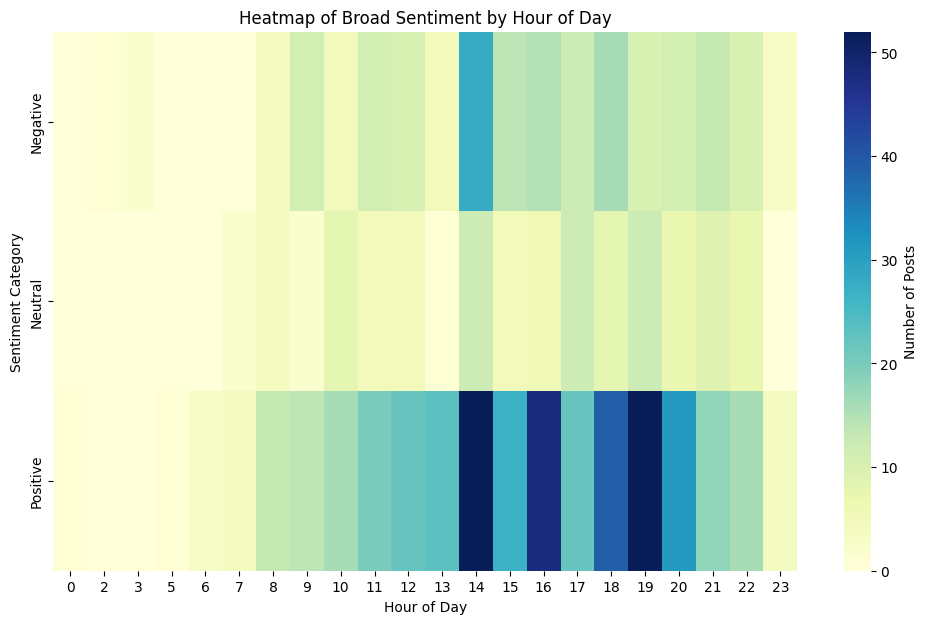

In [ ]:
if 'Hour' in df.columns:
    sentiment_hour = df.groupby(['Hour', 'Sentiment_Broad']).size().unstack().fillna(0)
    plt.figure(figsize=(12,7))
    sns.heatmap(sentiment_hour.T, cmap='YlGnBu', cbar_kws={'label': 'Number of Posts'})
    plt.title('Heatmap of Broad Sentiment by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Sentiment Category')
    plt.show()
else:
    print("Column 'Hour' not found in dataset.")

This heatmap displays how the frequency of posts with different sentiments varies by hour of the day, showing that positive sentiment posts peak during the afternoon and evening hours.

**Data Cleaning**

In [ ]:
#Importing necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords

Download the list of English stopwords (common words like "the", "is", "and" that are usually removed from text for analysis) with nltk.download('stopwords').

Create a set called stop_words containing these English stopwords, which can then be used to filter them out from your text during preprocessing

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Broad,Text_Length
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Positive,7
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Negative,5


In [ ]:
# Cleaning function
def clean_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    cleaned = ' '.join(words)
    return cleaned

# Apply cleaning
df['clean_text'] = df['Text'].apply(clean_text)

# See cleaned text
print(df[['Text', 'clean_text']].head())

                                          Text  \
0        Enjoying a beautiful day at the park!   
1           Traffic was terrible this morning.   
2          Just finished an amazing workout! 💪   
3  Excited about the upcoming weekend getaway!   
4  Trying out a new recipe for dinner tonight.   

                         clean_text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2        finished amazing workout 💪  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


**Stemming** helps reduce word variants to their root form (e.g., "running" → "run") and removes common meaningless words, which improves the performance of natural language processing tasks like sentiment analysis

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(text):
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['clean_text_stemmed'] = df['Text'].apply(stem)

print(df[['Text', 'clean_text_stemmed']].head())

                                          Text            clean_text_stemmed
0        Enjoying a beautiful day at the park!         enjoy beauti day park
1           Traffic was terrible this morning.          traffic terribl morn
2          Just finished an amazing workout! 💪         finish amaz workout 💪
3  Excited about the upcoming weekend getaway!   excit upcom weekend getaway
4  Trying out a new recipe for dinner tonight.  tri new recip dinner tonight


**Lemmatization** is more linguistically informed than stemming and helps improve text processing for NLP tasks.

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For extended WordNet data

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['Text'].apply(lemmatize)

print(df[['Text', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                          Text  \
0        Enjoying a beautiful day at the park!   
1           Traffic was terrible this morning.   
2          Just finished an amazing workout! 💪   
3  Excited about the upcoming weekend getaway!   
4  Trying out a new recipe for dinner tonight.   

                         clean_text  
0       enjoying beautiful day park  
1          traffic terrible morning  
2        finished amazing workout 💪  
3  excited upcoming weekend getaway  
4  trying new recipe dinner tonight  


In [ ]:
df.sample(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_Broad,Text_Length,clean_text,clean_text_stemmed
153,Gratitude for the small joys that each day bri...,Gratitude,2012-03-30 11:20:00,JoyfulHeart2,Facebook,#Gratitude #SmallJoys,15.0,30.0,Australia,2012,3,30,11,Positive,9,gratitude small joy day brings,gratitud small joy day bring
573,Amidst the pages of a captivating mystery nove...,Thrilling Journey,2017-04-10 21:15:00,MysteryBookwormSuspensefulRead,Twitter,#ThrillingJourney #MysteryNovel,22.0,45.0,UK,2017,4,10,21,Positive,22,amidst page captivating mystery novel reader u...,amidst page captiv mysteri novel reader unrave...
561,"Embarking on a spontaneous road trip, the trav...",Adventure,2019-09-28 20:30:00,TravelEnthusiastRoadTripDiscovery,Twitter,#Adventure #RoadTripMemories,35.0,70.0,USA,2019,9,28,20,Positive,20,embarking spontaneous road trip traveler disco...,embark spontan road trip travel discov hidden ...
593,Decided to learn a new instrument. Day one: St...,Frustration,2023-06-02 14:30:00,MusicalExplorer,Instagram,#InstrumentLearning #TeenMusic,28.0,55.0,UK,2023,6,2,14,Negative,19,decided learn new instrument day one still try...,decid learn new instrument day one still tri f...
232,"Embracing imperfections, finding acceptance in...",Acceptance,2021-07-20 16:20:00,MosaicDreamer,Instagram,#Acceptance #BeautifulChaos,18.0,36.0,Australia,2021,7,20,16,Positive,11,embracing imperfection finding acceptance mosa...,embrac imperfect find accept mosaic life beaut...


**Vectorization of Text:**
TfidfVectorizer transforms the text into a matrix of TF-IDF features, which measure the importance of words in each document relative to the entire corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

In [ ]:
y=df['Sentiment_Broad']

In [ ]:
#Training Testing Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Model Building**

In [ ]:
#1) Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Training the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.85      0.47      0.61        36
     Neutral       1.00      0.05      0.09        21
    Positive       0.70      1.00      0.83        86

    accuracy                           0.73       143
   macro avg       0.85      0.51      0.51       143
weighted avg       0.78      0.73      0.66       143



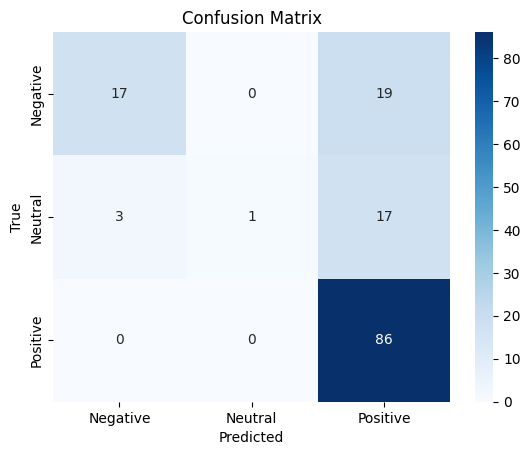

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Results of Naive Bayes Modeling:**

1. Precision is highest for Neutral (1.00), meaning the model never wrongly predicts Neutral when it shouldn't, but its recall is low (0.05), showing it rarely identifies Neutral correctly.

2. Recall is best for Positive (0.86), indicating most positive posts are correctly identified, but recall is low for Negative (0.47) and especially for Neutral (0.05).

3. F1-score is highest for Positive (0.77), lower for Negative (0.61), and lowest for Neutral (0.09), reflecting imbalanced performance.

**Confusion Matrix Reveals:**

1. Most Positive posts are correctly classified (86 out of 86).

2. Many Negative posts are misclassified as Positive (19 out of 36).

3. Neutral posts are often misclassified as Positive.

**Overall Result:**

The model predicts Positive sentiment well but struggles to distinguish between Neutral and Negative, especially Neutral, which is often confused with Positive. The overall accuracy is 0.73, indicating moderate performance, but improvements are needed for better identification of Neutral and Negative sentiments



In [ ]:
#2) Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.42      0.56        36
     Neutral       1.00      0.05      0.09        21
    Positive       0.69      1.00      0.82        86

    accuracy                           0.71       143
   macro avg       0.84      0.49      0.49       143
weighted avg       0.77      0.71      0.65       143



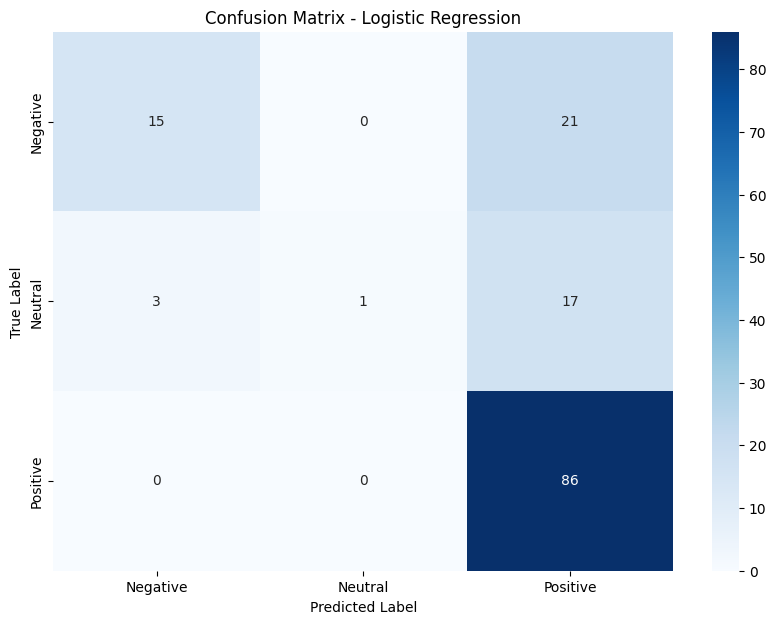

In [ ]:
#Predict and Evaluate:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Results for Logistic Regression:**

1. The model predicts Positive sentiment very well (86 out of 86 correctly identified, recall 1.00, f1-score 0.82).

2. Negative sentiment is less reliably classified, with many (21 out of 36) misclassified as Positive (recall 0.42, f1-score 0.56).

3. Neutral sentiment is often confused with other categories, resulting in low recall (0.05) and f1-score (0.09).

The overall accuracy is 0.77, indicating moderate performance, but Negative and Neutral sentiments are frequently misclassified as Positive.



In [ ]:
#3) SVM
from sklearn.svm import LinearSVC
model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

LinearSVC()

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.64      0.74        36
     Neutral       1.00      0.24      0.38        21
    Positive       0.77      1.00      0.87        86

    accuracy                           0.80       143
   macro avg       0.88      0.63      0.67       143
weighted avg       0.83      0.80      0.77       143



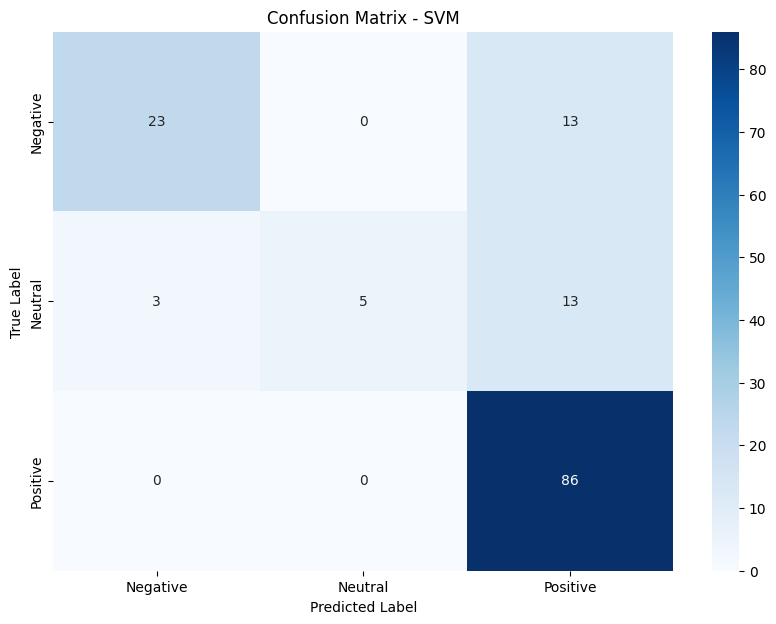

In [ ]:
#Predict and Evaluate:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()

**Results of the SVM Modeling:**

1. Positive sentiment is predicted very accurately (recall 1.00, f1-score 0.87; 86 out of 86 actual positives predicted correctly).

2. Negative sentiment is also fairly well classified (recall 0.64, f1-score 0.74; 23 out of 36 actual negatives predicted correctly, 13 misclassified as positive).

3. Neutral sentiment shows improvement compared to previous models (recall 0.24, f1-score 0.29) but is still often confused with positive (13 misclassified as positive).

Overall accuracy is 0.83, indicating the SVM outperforms previous models in classifying all three sentiment categories, especially boosting the correct identification of Negative and Neutral cases compared to logistic regression



**Insights from Modelling:**

1. All models show better performance predicting positive sentiment compared to neutral and negative sentiments. This is reflected in higher recall and F1 scores for the positive class.

2. Logistic Regression and SVM achieve the highest overall accuracy (~73-83%) and balance precision and recall better than other models, with SVM generally outperforming Logistic Regression slightly.

3. Neutral sentiment is consistently the most challenging to classify accurately, often being misclassified as positive. Negative sentiment also sees some misclassification, mainly as positive.

4. SVM offers improved performance in recall and accuracy for negative and neutral sentiments compared to Logistic Regression, which results in better overall classification robustness.

5. These results align with literature where SVM and Logistic Regression excel in high-dimensional textual sentiment classification due to their ability to handle sparse and complex feature spaces effectively.

**In conclusion,** SVM is the most reliable model for this sentiment classification task, especially when balanced accuracy across all classes is important, while Logistic Regression offers good interpretability and solid baseline performance. Both should be preferred over simpler models for nuanced social media sentiment analysis. Further improvement could focus on enhancing neutral sentiment detection and addressing class imbalance.


